# <center> <font color=#023F7C> **Data Visualization** </font>

<font color=#023F7C>**Hi! PARIS DataBootcamp 2023 🚀**</font> <br>


<img src = https://www.hi-paris.fr/wp-content/uploads/2020/09/logo-hi-paris-retina.png width = "300" height = "200" >


**Data visualization** is the representation of data and information in graphical or visual formats. <br> 
It involves creating visualizations such as charts, graphs, maps, and other visual elements to help understand patterns, trends, and relationships within the data. 


Data visualization is a fundamental component of **Exploratory Data Analysis** (EDA). It is often used for:
- **Data Understanding**: Data visualization provides a way to quickly grasp the distribution, central tendency, dispersion, and other key characteristics of the data. By visualizing the data, analysts can detect outliers, gaps, clusters, and potential issues that might not be immediately apparent from the raw data.

- **Pattern Discovery**: Visualizations help to identify patterns and trends that might not be obvious in tabular or raw data formats. Patterns that emerge from visualizations can lead to hypotheses or guide further analysis.

- **Relationship Exploration**: Visualization can reveal relationships between variables, such as correlations or dependencies, which can be vital for understanding how different factors interact with each other.


**Before you start to working on this notebook ⚠️**: <br>
Please download/copy this notebook from `hfactory_magic_folders\course` and drop it into your own directory `my_work` on HFactory. <br>
If you don't, you won't be able to save the modifications you've made on this notebook.

**Need help ? 🙏** <br>
You can go to this [page](https://python-graph-gallery.com/) with many examples of how to plot visualizations with Python. <br>
You can also check out the **Data visualization & Exploratory Data Analysis** bootcamp course.

In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None) #Show all columns

**Question 1:** <br>
**Load the dataframe you cleaned in the `Data_Clean.ipynb` notebook and saved as `dataset_train_clean.csv`** <br>
*Make sure you name the loaded dataframe `dataset` in the notebook.*

In [2]:
#dataset = pd.read_csv("dataset_train_clean.csv")

**You can load the original, uncleaned dataset using the following cell.** <br>
*Don't run this cell if you want to use the dataframe in `dataset_train_clean.csv`.*

In [3]:
path = r'~/hfactory_magic_folders/course/Dataset/dataset_train.csv'
dataset = pd.read_csv(path,encoding='latin-1',sep=';')

**Question 2**: <br>
**Display the pie chart of the proportion of each unique value of 'Customer Segment' (print the %)** <br>
Go to https://python-graph-gallery.com/pie-plot/ to find examples of pie plots.<br>

In [4]:
# Create a dataframe with the proportion of each unique value in Customer Segement
df_pieplot = dataset["Customer Segment"].value_counts().to_frame("count").reset_index()
df_pieplot

Customer Segment  count
0         Consumer  70956
1        Corporate  49769
2      Home Office  14675

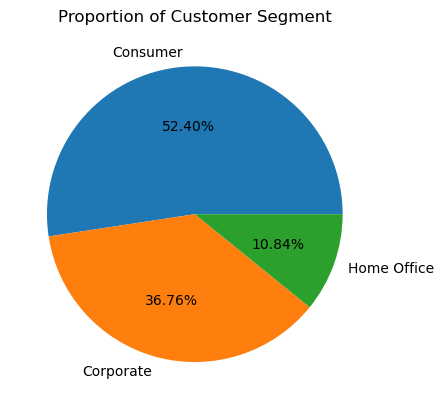

In [5]:
# Plot the pie chart
x = df_pieplot["count"]
label = df_pieplot["Customer Segment"]

plt.pie(x, labels=label, autopct="%.2f%%") # use autopct="%.2f%%" to compute the percentage from the count variable
plt.title("Proportion of Customer Segment")
plt.show()

**Question 3**: <br>
**Display a horizontal bar plot showing the proportion of `Order status` values.** <br>
**`Order status` must be ordered in ascending order.**



In [6]:
# Compute the proportion of each unique value/category in Order status
df_barplot = dataset["Order Status"].value_counts(ascending=True).to_frame("count").reset_index()
df_barplot

Order Status  count
0   PAYMENT_REVIEW   1472
1         CANCELED   2498
2  SUSPECTED_FRAUD   2634
3          ON_HOLD   7832
4          PENDING  13542
5           CLOSED  14327
6       PROCESSING  14492
7  PENDING_PAYMENT  31009
8         COMPLETE  47594

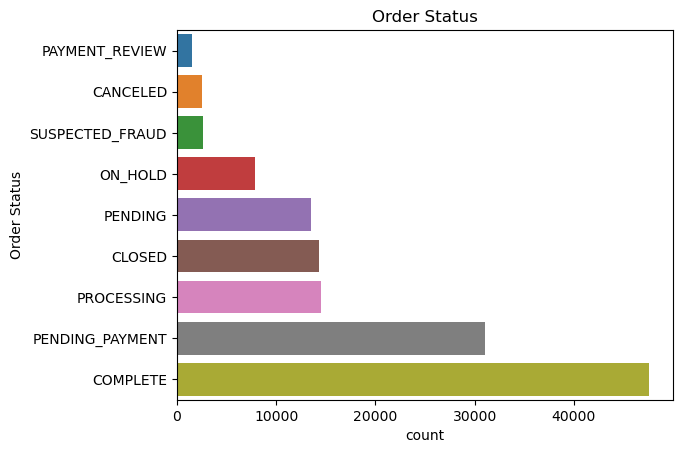

In [7]:
# Horizontal bar plot with the proportion of Order status
sns.barplot(data=df_barplot, x="count",y="Order Status")
plt.title("Order Status")
plt.show()

**Question 4**: <br>
**Compute the correlation matrix of the numerical variables in the dataframe with `.corr()`** <br>
**The, display this matrix with `sns.heatmap()`**


In [8]:
# Compute the correlation matrix
df_corr = dataset.corr(numeric_only=True)

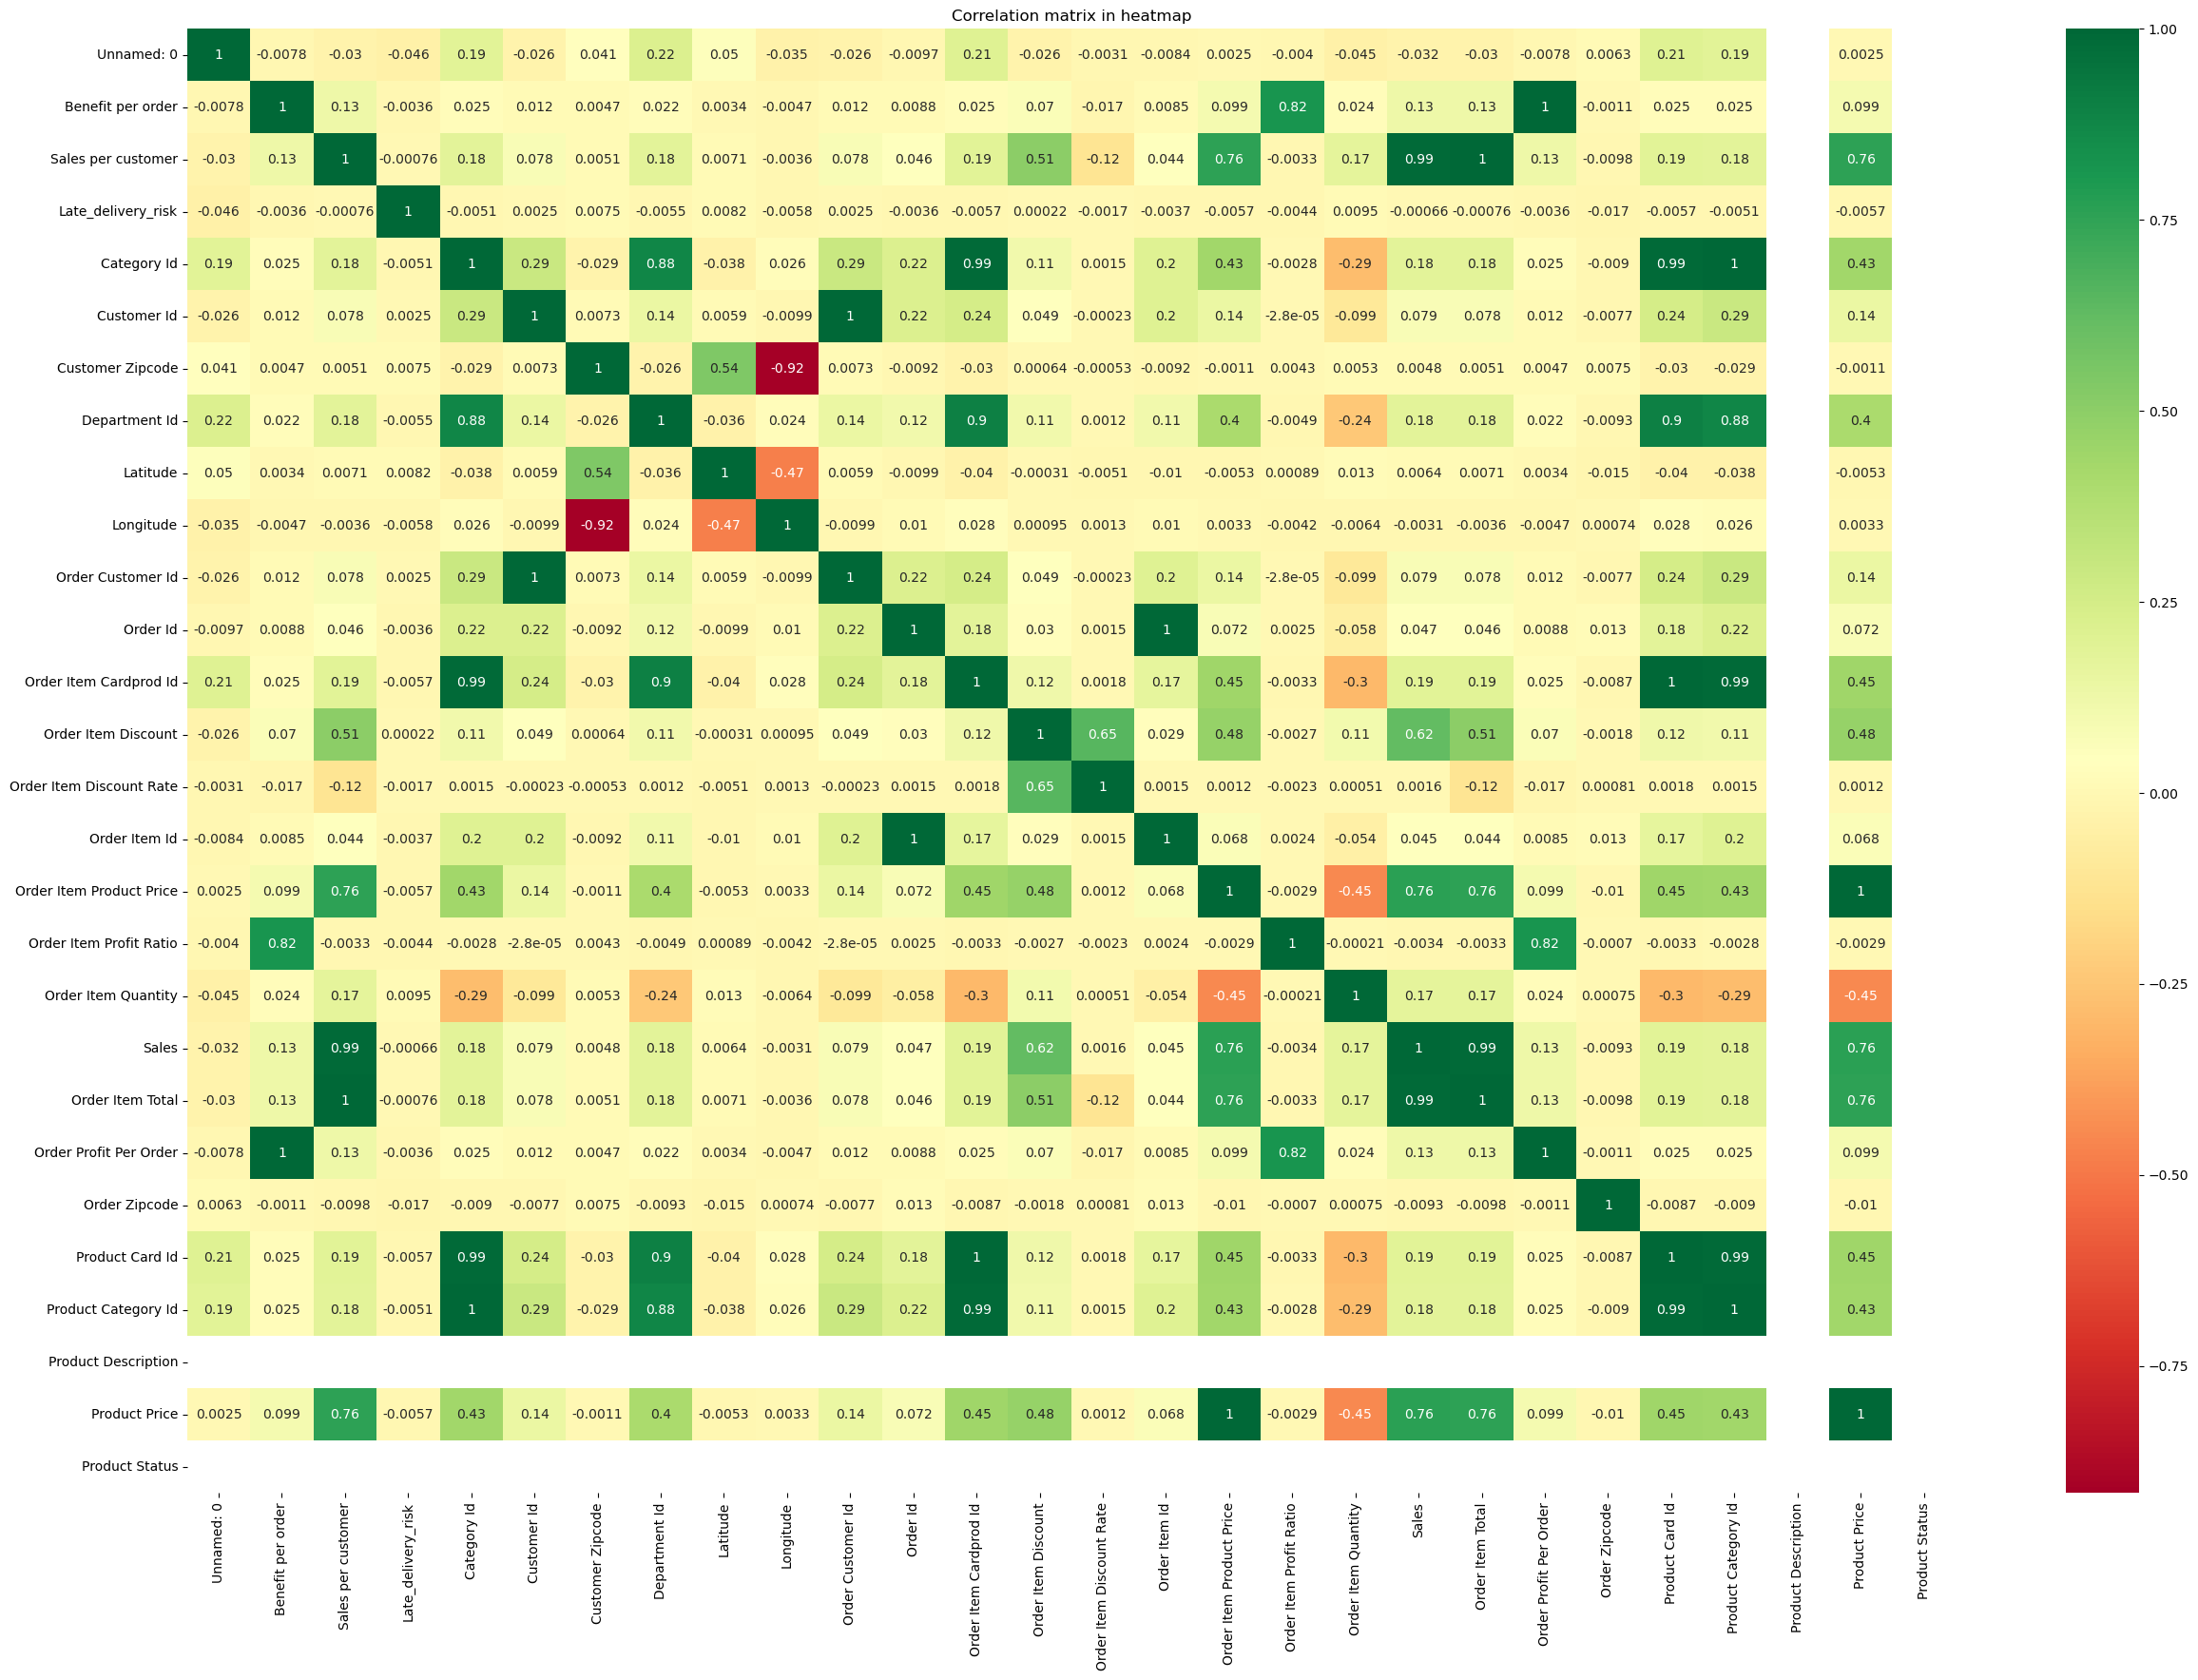

In [9]:
# Plot the heatmap from the correlation matrix
plt.figure(figsize=(30,20))
plt.title("Correlation matrix in heatmap")

sns.heatmap(df_corr,annot=True, cmap="RdYlGn")
plt.show()

**Now, drop the columns that are highly correlated with others**. <br>
*Make sure you don't drop `Late_delivery_risk` from the dataframe* 

In [10]:
dataset = dataset.drop(columns=["Sales per customer","Product Card Id"])

**Finally, save the new dataframe with `.to_csv("dataset_train_clean.csv",index=False)`**

In [11]:
dataset.to_csv("dataset_train_clean.csv",index=False)

**Question 5**: <br>
**Display the average sales per day of order (1 to 31).** <br>
*You can use `.split("/")[1]` to get the day in a full date (with year, month, day, time).*

In [12]:
# Get the order day from the order dates with .split() and a for-loop
column_date = dataset["order date (DateOrders)"].to_list()

new_list = []
for date in column_date:
    new_list.append(date.split("/")[1])

dataset["order date (DateOrders)"] = new_list

In [13]:
# Use .groupby().mean() to get the average sales per order day
df_avgsales_day = dataset[["Sales","order date (DateOrders)"]].groupby("order date (DateOrders)").mean().reset_index()
df_avgsales_day.head()

order date (DateOrders)       Sales
0                       1  195.076258
1                      10  190.048540
2                      11  190.313443
3                      12  193.389997
4                      13  193.203984

In [14]:
# Convert "order date (DateOrders)" column to int value then sort dataframe using "order date (DateOrders)"
df_avgsales_day["order date (DateOrders)"] = df_avgsales_day["order date (DateOrders)"].astype("int")
df_avgsales_day = df_avgsales_day.sort_values(by="order date (DateOrders)")

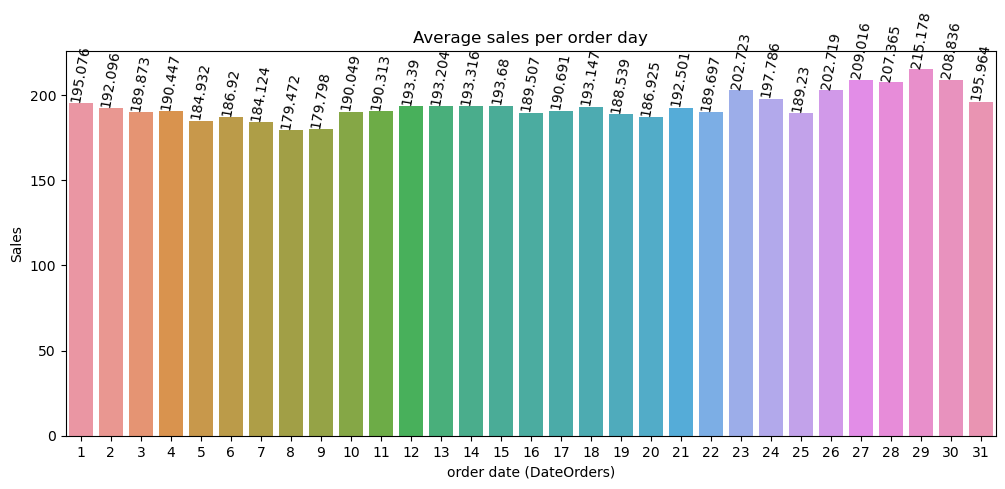

In [15]:
# Plot the bar plot with average sales per order day
plt.figure(figsize = (12,5))
plt.title('Average sales per order day')
ax = sns.barplot(data=df_avgsales_day, x="order date (DateOrders)", y="Sales")

# Show the labels of the bars with a 80° degree rotation
for i in ax.containers:
    ax.bar_label(i,rotation=80)

**Question 6:** <br>
**Display an interactive bar plot showing the number of overdue orders by country with `px.bar()`** <br>


In [16]:
# Create a dataframe with the number of orders per order country
order_delay = dataset.loc[dataset['Delivery Status']=='Late delivery']
df_order_delay = order_delay[["Delivery Status","Order Country"]].groupby("Order Country").count().reset_index()
df_order_delay.columns = ["Order Country","Number of orders"]

In [17]:
# Plot interactive bar plot 
px.bar(df_order_delay,  title="Number of orders per Order Country",
       x="Order Country", y="Number of orders", color="Number of orders")

**Question 7 (Bonus)**: <br>
**Display a bar plot showing the number of orders sorted by delivery status.** <br> 
**In addition, each bar must be broken down into 'Order region' (use a stacked bar plot).**

*You can use the `color` parameter in `px.bar()` to create the stacked bar plot.*

In [18]:
# Compute number of orders per delivery status and order region with .groupby().count()
delivery_status_region = dataset.groupby(["Delivery Status","Order Region"])["Order Id"].count().reset_index(name="Number of orders")
delivery_status_region.head()

Delivery Status     Order Region  Number of orders
0  Advance shipping           Canada               223
1  Advance shipping        Caribbean              1501
2  Advance shipping   Central Africa               261
3  Advance shipping  Central America              5049
4  Advance shipping     Central Asia                80

In [19]:
# Compute number of orders per delivery status and order region with .value_counts()
delivery_status_region = dataset[["Delivery Status","Order Region"]].value_counts().reset_index(name="Number of orders")

In [20]:
# Interative stacked bar plot with plotly
px.bar(delivery_status_region, x="Delivery Status", y="Number of orders",
       color=delivery_status_region["Order Region"]) # use color to create stacked bar      

**Question 8 (Bonus)**: <br>
**Display a choropleth map with each order country, where the total `'Benefit per order'` per order country is displayed with color.**

*You can use plotly's `px.choropleth()` function with `locationmode='country names'` to create a map from the order country column.*

The `locationmode` parameter is used to specify how the locations are defined in plotly's choropleth map. <br>
It determines how Plotly should interpret and match the locations in your data to the actual geographic locations on the map.

In [21]:
# Compute the total benefit per order country
geo_df = dataset.groupby(['Order Country'])['Benefit per order'].sum().reset_index(name='total benefit').sort_values(by='total benefit',ascending=True)
geo_df.head()

Order Country  total benefit
35    Guinea-Bissau   -1001.020039
148    Sierra Leone    -485.520028
46          Liberia    -388.889995
153          Taiwan    -350.000017
29            Gabon    -334.720005

In [22]:
# Plot the choropleth math 
fig = px.choropleth(geo_df, locationmode='country names', locations='Order Country', color='total benefit', 
                    hover_name='Order Country', title="Total benefit per Order Country")
fig.show()

**Now you can display other graphs as you see fit.**

In [57]:
pd.Series({'other':v_c.sum()-v_c[:parametre].sum()})

other    4403
dtype: int64

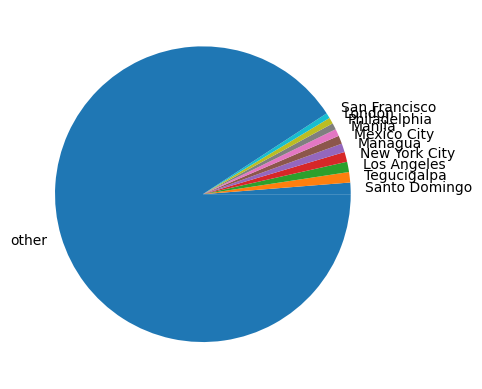

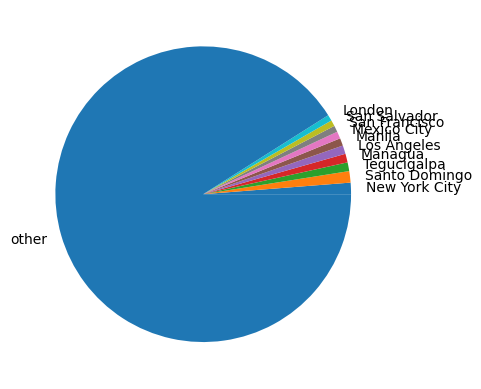

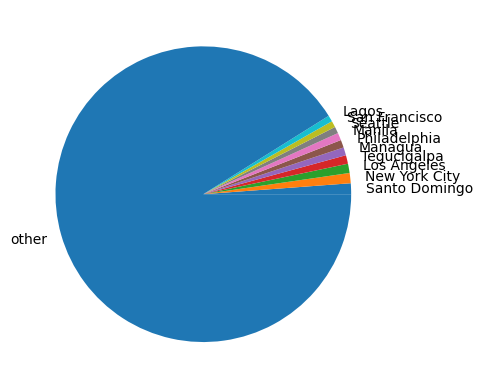

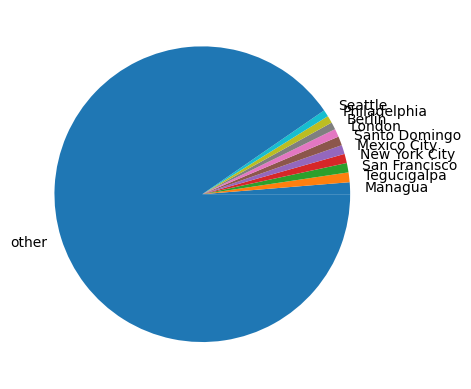

In [63]:
parametre=10
for type_late in dataset['Delivery Status'].drop_duplicates():
    plt.figure()
    v_c=dataset[dataset['Delivery Status']==type_late]['Order City'].value_counts()
    v_c_with_other=pd.concat([v_c[:parametre],pd.Series({'other':v_c.sum()-v_c[:parametre].sum()})])
    v_c_with_other.plot(kind='pie')

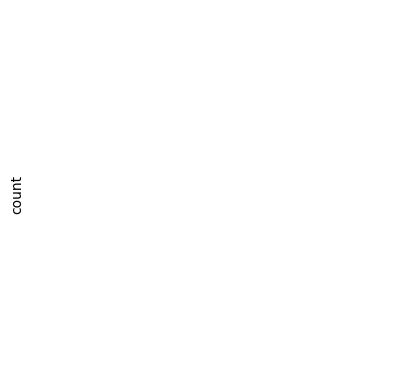

In [36]:
for type_late in dataset['Delivery Status'].drop_duplicates():
    dataset[dataset['Delivery Status']==type_late].groupby(['Customer City']).value_counts().plot(kind='pie')

In [28]:
dataset

Unnamed: 0      Type  Benefit per order   Delivery Status  \
0                0     DEBIT          91.250000  Advance shipping   
1                1  TRANSFER        -249.089996     Late delivery   
2                2      CASH        -247.779999  Shipping on time   
3                3     DEBIT          22.860001  Advance shipping   
4                4   PAYMENT         134.210007  Advance shipping   
...            ...       ...                ...               ...   
135395      135395  TRANSFER          50.000000  Shipping on time   
135396      135396  TRANSFER          35.000000  Shipping on time   
135397      135397  TRANSFER         -40.740002     Late delivery   
135398      135398  TRANSFER          34.919998     Late delivery   
135399      135399  TRANSFER          29.100000  Shipping on time   

        Late_delivery_risk  Category Id    Category Name Customer City  \
0                        0           73   Sporting Goods        Caguas   
1                        1           73   Sporting Goods        Caguas   
2                        0           73   Sporting Goods      San Jose   
3                        0           73   Sporting Goods   Los Angeles   
4                        0           73   Sporting Goods        Caguas   
...                    ...          ...              ...           ...   
135395                   0           24  Women's Apparel        Goleta   
135396                   0           24  Women's Apparel       Chicago   
135397                   1           29    Shop By Sport      Brooklyn   
135398                   0           24  Women's Apparel       Wichita   
135399                   0           24  Women's Apparel     Tonawanda   

       Customer Country            Customer Email Customer Fname  Customer Id  \
0           Puerto Rico          lsnbda@kf2v1q.de          Cally        20755   
1           Puerto Rico          wseo84tf@uc0.com          Irene        19492   
2               EE. UU.     yzimksmhb9a69x@lg3.uk        Gillian        19491   
3               EE. UU.        47o7f@hs33lrrzy.de           Tana        19490   
4           Puerto Rico       i8klginy@mpxxupn.uk           Orli        19489   
...                 ...                       ...            ...          ...   
135395          EE. UU.   37efs0xs0ody@325xon1.fr         Thomas         5625   
135396          EE. UU.      01dlkyr@r43p3dw4.com        Kenneth        11417   
135397          EE. UU.  s52lfoewbp9x@krcpuml3.uk        Crystal         4572   
135398          EE. UU.   0r0pgfg879xxll@o46i.com      Elizabeth         2001   
135399          EE. UU.     lb174sqpdxu4jz@q7.com           Mary         4458   

       Customer Lname Customer Password Customer Segment Customer State  \
0            Holloway         XXXXXXXXX         Consumer             PR   
1                Luna         XXXXXXXXX         Consumer             PR   
2           Maldonado         XXXXXXXXX         Consumer             CA   
3                Tate         XXXXXXXXX      Home Office             CA   
4           Hendricks         XXXXXXXXX        Corporate             PR   
...               ...               ...              ...            ...   
135395          Smith         XXXXXXXXX         Consumer             CA   
135396        Whitney         XXXXXXXXX         Consumer             IL   
135397         Lucero         XXXXXXXXX         Consumer             NY   
135398          Smith         XXXXXXXXX         Consumer             KS   
135399          Smith         XXXXXXXXX         Consumer             NY   

                 Customer Street  Customer Zipcode  Department Id  \
0       5365 Noble Nectar Island             725.0              2   
1               2679 Rustic Loop             725.0              2   
2           8510 Round Bear Gate           95125.0              2   
3                3200 Amber Bend           90027.0              2   
4       8671 Iron Anchor Corners             725.0              2   
..